# Recommendation systems

In [90]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split
from collections import defaultdict

In [91]:
df1=pd.read_csv('ratings_Electronics (1).csv',names=['User_Id', 'Product_Id','Rating','Timestamp'])
df1.head()

,User_Id,Product_Id,Rating,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   User_Id     object 
 1   Product_Id  object 
 2   Rating      float64
 3   Timestamp   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [93]:
df1['Rating'].value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: Rating, dtype: int64

In [94]:
df1['Rating']=df1['Rating'].astype(int)

As rating dosent involve any decimal values we have converted it to integer.

In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   User_Id     object
 1   Product_Id  object
 2   Rating      int32 
 3   Timestamp   int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 208.9+ MB


In [96]:
df1.shape

(7824482, 4)

In [97]:
df1.drop(columns=["Timestamp"], inplace=True)
df1.head()

,User_Id,Product_Id,Rating
0,AKM1MP6P0OYPR,0132793040,5
1,A2CX7LUOHB2NDG,0321732944,5
2,A2NWSAGRHCP8N5,0439886341,1
3,A2WNBOD3WNDNKT,0439886341,3
4,A1GI0U4ZRJA8WN,0439886341,1


As we do not require Timestamp column for further analysis we have removed it.

In [98]:
df1 = df1[:int(len(df1) * .1)]
df1.shape

(782448, 3)

Our orignal dataset countains 78,24,482 rows it really diffecult to make any changes for futher analysis as its very huge and will consume time , so we have taken only the 10% of the total obsevations .i.e. 7,82,448.

In [99]:
print("Total number of Ratings submitted :",df1.shape[0])
print("Total number of Users   :", len(np.unique(df1['User_Id'])))
print("Total number of Products  :", len(np.unique(df1['Product_Id'])))

Total number of Ratings submitted : 782448
Total number of Users   : 606149
Total number of Products  : 47105


In [100]:
df1.describe()

,Rating
count,782448.000000
mean,3.981954
std,1.396133
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


Here we can see that max rating is 5 and min rating is 1 and 50% of the users have given ratings as 5.

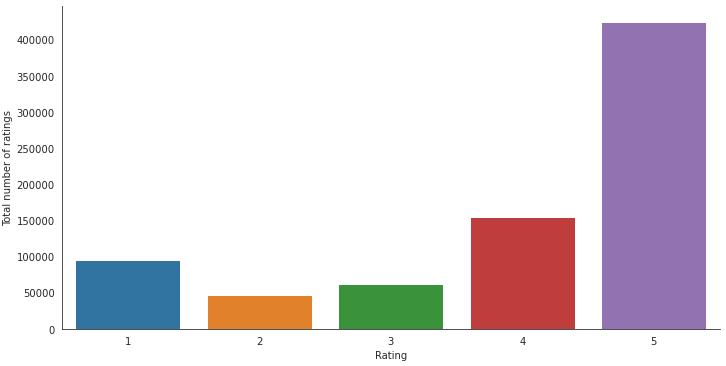

In [101]:
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=df1, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

This is the distribution of the ratings with repect to the total obervations or ratings submitted.

# POPULARITY BASED RECOMMENDATION

In [102]:
user_count = df1['User_Id'].value_counts()
df2 = df1[df1['User_Id'].isin(user_count[user_count >= 50].index)]
df2.shape

(2550, 3)

Here we are filtering users who have done rating for more than 50 products

In [103]:
df3 = df2.groupby('Product_Id').agg({'User_Id': 'count'}).reset_index()
df3.rename(columns = {'User_Id': 'Count_Of_Users'},inplace=True)
df3.head()

,Product_Id,Count_Of_Users
0,1400532655,1
1,B000000O48,1
2,B000001OL6,1
3,B000001OMN,1
4,B00000J05A,1


In [104]:
df3_data_sort = df3.sort_values(['Count_Of_Users', 'Product_Id'], ascending =False) 
df3_data_sort.head(5)

,Product_Id,Count_Of_Users
113,B00004SB92,6
1099,B00008OE6I,5
2179,B000BKJZ9Q,4
2100,B0009RKL5S,4
1336,B0000AKVHF,4


In the above two cells we have groped Product_Id and User_id and fiding out the count of users who have selected a product and have sorted it in decending order, so we can distinguish the most popular products present.

In [105]:
popularity_recommendations = df3_data_sort.head(5) 

In [106]:
def recommend(User_Id):     
    user_recommend = popularity_recommendations 
    user_recommend['User_Id'] = User_Id 
    cols = user_recommend.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommend = user_recommend[cols] 
          
    return user_recommend 

Here we have created a user defined function so as we recommend products based on popularity.

In [107]:
find_recommendations = [14,75]   
for i in find_recommendations:
    print("Here is the recommendation for the User Id: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the User Id: 14

      User_Id  Product_Id  Count_Of_Users
113        14  B00004SB92               6
1099       14  B00008OE6I               5
2179       14  B000BKJZ9Q               4
2100       14  B0009RKL5S               4
1336       14  B0000AKVHF               4


Here is the recommendation for the User Id: 75

      User_Id  Product_Id  Count_Of_Users
113        75  B00004SB92               6
1099       75  B00008OE6I               5
2179       75  B000BKJZ9Q               4
2100       75  B0009RKL5S               4
1336       75  B0000AKVHF               4




In the above cell we have provided 2 inputs .i.e random User_Ids for which the Popularity based recommendation model will recommend product to it.

# COLABORATIVE FILTERING RECOMMENDATION SYSTEM

In [108]:
reader = Reader(rating_scale=(1, 5))
df4 = Dataset.load_from_df(df2,reader)
df4

In [109]:
trainset, testset = train_test_split(df4, test_size=0.3,random_state=10)

In [110]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [111]:
test_pred = algo.test(testset)

In [112]:
def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

#### User Defined function for getting top 5 predictions

In [113]:
top_n = get_top_n(test_pred, n=5)
top_n

defaultdict(list,
            {'A25HBO5V8S8SEA': [('B0000691IO', 5),
              ('B00005ICE1', 5),
              ('B00007KDVI', 4.975806451612903),
              ('B00006HCHH', 4.975806451612903),
              ('B00006HXF4', 4.975806451612903)],
             'A1F9Z42CFF9IAY': [('B00001WRSJ', 4.197759103641457),
              ('B000BJSEQW', 4.197759103641457),
              ('B00007E7QS', 4.197759103641457),
              ('B00078GLJY', 4.197759103641457),
              ('B00007H08Y', 4.197759103641457)],
             'A1MJMYLRTZ76ZX': [('B00004YZLV', 4.608695652173913),
              ('B00007B6L5', 4.608695652173913),
              ('B00005NHH8', 4.608695652173913),
              ('B000031KIM', 4.608695652173913),
              ('B000BKJZ9Q', 4.608695652173913)],
             'A5JLAU2ARJ0BO': [('B00008OE6I', 4.262334032145352),
              ('B0007KQWF0', 4.197759103641457),
              ('B00008BO91', 4.197759103641457),
              ('B00006HYWR', 4.197759103641457),
         

In [114]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A25HBO5V8S8SEA ['B0000691IO', 'B00005ICE1', 'B00007KDVI', 'B00006HCHH', 'B00006HXF4']
A1F9Z42CFF9IAY ['B00001WRSJ', 'B000BJSEQW', 'B00007E7QS', 'B00078GLJY', 'B00007H08Y']
A1MJMYLRTZ76ZX ['B00004YZLV', 'B00007B6L5', 'B00005NHH8', 'B000031KIM', 'B000BKJZ9Q']
A5JLAU2ARJ0BO ['B00008OE6I', 'B0007KQWF0', 'B00008BO91', 'B00006HYWR', 'B00006484F']
AT2J7H5TRZM8Z ['B00006JM1W', 'B00005BIB8', 'B00006484F', 'B00000J4FS', 'B0000635UX']
A231WM2Z2JL0U3 ['B0000630TO', 'B000021YUO', 'B00004SB92', 'B00001YVG4', 'B00004SCKA']
A2AEZQ3DGBBLPR ['B00005QXWI', 'B00005YTX0', 'B00006ANXP', 'B00004Y2MM', 'B00004X084']
AGXV8E7XK9J6H ['B0007Y794O', 'B0001D3K8A', 'B00009XVBU', 'B0007NIB74', 'B00091SBU6']
AGHZXQL9F94T9 ['B000069BJ9', 'B0002IONG2', 'B00008MZ0B', 'B0007MVHZS', 'B00008L3HI']
A6FIAB28IS79 ['B0007LJHVA', 'B00005138B', 'B0007LJHVK', 'B0006N2P8Q', 'B0001FV3AK']
A3OXHLG6DIBRW8 ['B000067VBL', 'B00004ZCJE', 'B0000ARKWY', 'B00006IJO9', 'B00006JQLB']
A12DLJESJKM1OQ ['B00008OE5I', 'B0000DBJJT', 'B000087L74', 'B

Here we are printing the recommended items for a user

In [115]:
pred = pd.DataFrame(test_pred)
pred[pred['uid'] == 'A231WM2Z2JL0U3'][['iid', 'r_ui','est']].sort_values(by = 'est',ascending = False).head(10)

,iid,r_ui,est
496,B0000630TO,5.0,5.000000
385,B000021YUO,5.0,4.685422
371,B00004SB92,5.0,4.590414
414,B00001YVG4,5.0,4.544118
18,B00004SCKA,4.0,4.318311
156,B00005LB8P,5.0,4.294118
699,B00004VX3T,5.0,4.294118
576,B00005B0BY,5.0,4.294118
445,B00007KDVI,5.0,4.294118
395,B00005T3T6,5.0,4.294118


Here we are entering a user id and the Collaborating filtering Recommdention system is is recomending the user the products similar to the products it has bought and what other similar user had bought.

#                            Thank you!